# Model Building

In [3]:
#imports
from zipfile import ZipFile
import io
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [4]:
with ZipFile("../Data/data_500k.zip", 'r') as zip_ref:
    with zip_ref.open("data_500k.csv") as file:
        data = pd.read_csv(file)
# data = pd.read_csv('../Data/full_cleaned_data.csv')
data.head()

,Unnamed: 0,user_id,bill_id,line_item_amount,bill_discount,transaction_date,description,inventory_category,colour,size,zone_name,store_name,year,transaction_day,transaction_month
0,0,415679767,437163026,1149.5000,0.0,2019-01-24,44834,14865,324,60,2,66,2019,24,1
1,1,390012212,433802253,797.4888,0.0,2019-01-08,522,52082,245,48,2,52,2019,8,1
2,2,237972387,459218947,5.0000,0.0,2019-05-01,24523,11773,270,45,4,128,2019,1,5
3,3,355218802,473428583,1318.2509,0.0,2019-06-23,83416,39853,290,26,4,134,2019,23,6
4,4,495357933,711621404,0.0010,0.0,2022-04-05,24525,11774,266,59,1,28,2022,5,4


In [5]:
data_d = data.drop(columns=['Unnamed: 0','transaction_date'])
data_d.head()

,user_id,bill_id,line_item_amount,bill_discount,description,inventory_category,colour,size,zone_name,store_name,year,transaction_day,transaction_month
0,415679767,437163026,1149.5000,0.0,44834,14865,324,60,2,66,2019,24,1
1,390012212,433802253,797.4888,0.0,522,52082,245,48,2,52,2019,8,1
2,237972387,459218947,5.0000,0.0,24523,11773,270,45,4,128,2019,1,5
3,355218802,473428583,1318.2509,0.0,83416,39853,290,26,4,134,2019,23,6
4,495357933,711621404,0.0010,0.0,24525,11774,266,59,1,28,2022,5,4


In [6]:
encoder = LabelEncoder()
data_d['description'] = encoder.fit_transform(data_d['description'])
data_d['inventory_category'] = encoder.fit_transform(data_d['inventory_category'])
data_d['colour'] = encoder.fit_transform(data_d['colour'])
data_d['size'] = encoder.fit_transform(data_d['size'])
data_d['zone_name'] = encoder.fit_transform(data_d['zone_name'])
data_d['store_name'] = encoder.fit_transform(data_d['store_name'])
data_d['size'] = encoder.fit_transform(data_d['size'])
data_d.head()

,user_id,bill_id,line_item_amount,bill_discount,description,inventory_category,colour,size,zone_name,store_name,year,transaction_day,transaction_month
0,415679767,437163026,1149.5000,0.0,23560,9011,295,51,2,66,2019,24,1
1,390012212,433802253,797.4888,0.0,227,33973,222,44,2,52,2019,8,1
2,237972387,459218947,5.0000,0.0,11493,6617,245,41,4,127,2019,1,5
3,355218802,473428583,1318.2509,0.0,46449,26015,264,25,4,133,2019,23,6
4,495357933,711621404,0.0010,0.0,11495,6618,242,50,1,28,2022,5,4


#### Feature Engineering:

In [7]:
scaler = StandardScaler()

scaled_data = scaler.fit_transform(data_d)

scaled_data = pd.DataFrame(scaled_data, columns=data_d.columns)
scaled_data.head()

,user_id,bill_id,line_item_amount,bill_discount,description,inventory_category,colour,size,zone_name,store_name,year,transaction_day,transaction_month
0,0.205440,-1.020789,-0.200992,-0.097732,-0.294562,-0.859362,0.949231,0.717877,-1.445888,-1.193507,-0.707107,0.934079,-1.615315
1,-0.017566,-1.047878,-0.585007,-0.097732,-1.680131,1.346148,0.134510,0.235992,-1.445888,-1.393387,-0.707107,-0.869242,-1.615315
2,-1.338523,-0.843009,-1.449547,-0.097732,-1.011129,-1.070884,0.391203,0.029470,0.364450,-0.322603,-0.707107,-1.658194,-0.520335
3,-0.319859,-0.728474,-0.016899,-0.097732,1.064642,0.643021,0.603254,-1.071981,0.364450,-0.236941,-0.707107,0.821371,-0.246590
4,0.897702,1.191453,-1.455000,-0.097732,-1.011010,-1.070795,0.357721,0.649036,-2.351058,-1.736038,1.414214,-1.207364,-0.794080


### Train Test Split

In [8]:
from sklearn.model_selection import train_test_split

# Splitting the data
X_train, X_test = train_test_split(scaled_data, test_size=0.3, random_state=42)

# Check the size of the splits
print(f"Training Set Size: {X_train.shape}")
print(f"Testing Set Size: {X_test.shape}")


Training Set Size: (350000, 13)
Testing Set Size: (150000, 13)


##### K-Means

In [10]:
from sklearn.cluster import KMeans

# Train K-Means on the training set
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_train)

# Predict clusters for both the training and test sets
train_clusters_kmeans = kmeans.predict(X_train)
test_clusters_kmeans = kmeans.predict(X_test)

# Plot the results for both sets
# #plt.scatter(X_train[:, 0], X_train[:, 1], c=train_clusters_kmeans)
# plt.title('K-Means Clustering on Training Set')
# plt.show()

# #plt.scatter(X_test[:, 0], X_test[:, 1], c=test_clusters_kmeans)
# plt.title('K-Means Clustering on Test Set')
# plt.show()


#### Fuzzy C-Means

In [11]:
import skfuzzy as fuzz
import numpy as np

# Train Fuzzy C-Means on the training set
cntr, u_train, u0, d, jm, p, fpc = fuzz.cluster.cmeans(X_train.T, 5, 2, error=0.005, maxiter=1000)

# Predict clusters for the training set
train_clusters_fcm = np.argmax(u_train, axis=0)

# Use the same trained model for the test set
u_test, _, _, _, _, _ = fuzz.cluster.cmeans_predict(X_test.T, cntr, 2, error=0.005, maxiter=1000)
test_clusters_fcm = np.argmax(u_test, axis=0)

# Plot the results for both sets
#plt.scatter(X_train[:, 0], X_train[:, 1], c=train_clusters_fcm)
#plt.title('Fuzzy C-Means Clustering on Training Set')
#plt.show()

#plt.scatter(X_test[:, 0], X_test[:, 1], c=test_clusters_fcm)
#plt.title('Fuzzy C-Means Clustering on Test Set')
#plt.show()


#### Single-Linkage

In [12]:
from sklearn.cluster import AgglomerativeClustering

# Train SLINK on the training set
slink = AgglomerativeClustering(n_clusters=5, linkage='single')
train_clusters_slink = slink.fit_predict(X_train)

# Use the trained model to predict the test set clusters
test_clusters_slink = slink.fit_predict(X_test)

# Plot the results for both sets
# plt.scatter(X_train[:, 0], X_train[:, 1], c=train_clusters_slink)
# plt.title('Single-Linkage Clustering on Training Set')
# plt.show()

# plt.scatter(X_test[:, 0], X_test[:, 1], c=test_clusters_slink)
# plt.title('Single-Linkage Clustering on Test Set')
# plt.show()



#### Self-Organizing Maps (SOM)

In [13]:
from minisom import MiniSom
X_train_np = np.array(X_train)
X_test_np = np.array(X_test)

# Train SOM on the training set
som = MiniSom(5, 5, X_train_np.shape[1], sigma=0.3, learning_rate=0.5)
som.random_weights_init(X_train_np)
som.train_random(X_train_np, 100)

X_train_n = X_train_np.astype(float)
X_test_n = X_test_np.astype(float)
# Predict clusters for both sets
train_clusters_som = [som.winner(x) for x in X_train_n]
test_clusters_som = [som.winner(x) for x in X_test_n]

# Plot the results for both sets (simplified visualization)
# plt.scatter(X_train[:, 0], X_train[:, 1], c=[c[0] * 5 + c[1] for c in train_clusters_som])
# plt.title('SOM Clustering on Training Set')
# plt.show()

# plt.scatter(X_test[:, 0], X_test[:, 1], c=[c[0] * 5 + c[1] for c in test_clusters_som])
# plt.title('SOM Clustering on Test Set')
# plt.show()



#### Evaluation

In [14]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
# Evaluate K-Means on train and test sets
sil_train_kmeans = silhouette_score(X_train, train_clusters_kmeans)
sil_test_kmeans = silhouette_score(X_test, test_clusters_kmeans)

dbi_train_kmeans = davies_bouldin_score(X_train, train_clusters_kmeans)
dbi_test_kmeans = davies_bouldin_score(X_test, test_clusters_kmeans)

print(f"K-Means Silhouette: Train = {sil_train_kmeans}, Test = {sil_test_kmeans}")
print(f"K-Means DBI: Train = {dbi_train_kmeans}, Test = {dbi_test_kmeans}")

# Evaluate Fuzzy C-Means on train and test sets
sil_train_fcm = silhouette_score(X_train, train_clusters_fcm)
sil_test_fcm = silhouette_score(X_test, test_clusters_fcm)

dbi_train_fcm = davies_bouldin_score(X_train, train_clusters_fcm)
dbi_test_fcm = davies_bouldin_score(X_test, test_clusters_fcm)

print(f"Fuzzy C-Means Silhouette: Train = {sil_train_fcm}, Test = {sil_test_fcm}")
print(f"Fuzzy C-Means DBI: Train = {dbi_train_fcm}, Test = {dbi_test_fcm}")

# Evaluate Single-Linkage on train and test sets
sil_train_slink = silhouette_score(X_train, train_clusters_slink)
sil_test_slink = silhouette_score(X_test, test_clusters_slink)

dbi_train_slink = davies_bouldin_score(X_train, train_clusters_slink)
dbi_test_slink = davies_bouldin_score(X_test, test_clusters_slink)

print(f"Single-Linkage Silhouette: Train = {sil_train_slink}, Test = {sil_test_slink}")
print(f"Single-Linkage DBI: Train = {dbi_train_slink}, Test = {dbi_test_slink}")

# Evaluate SOM on train and test sets
sil_train_som = silhouette_score(X_train, [c[0] * 5 + c[1] for c in train_clusters_som])
sil_test_som = silhouette_score(X_test, [c[0] * 5 + c[1] for c in test_clusters_som])

dbi_train_som = davies_bouldin_score(X_train, [c[0] * 5 + c[1] for c in train_clusters_som])
dbi_test_som = davies_bouldin_score(X_test, [c[0] * 5 + c[1] for c in test_clusters_som])

print(f"SOM Silhouette: Train = {sil_train_som}, Test = {sil_test_som}")
print(f"SOM DBI: Train = {dbi_train_som}, Test = {dbi_test_som}")



K-Means Silhouette: Train = 0.12715856828505376, Test = 0.1265753415458646
K-Means DBI: Train = 1.9483543207682286, Test = 1.951770318126653
Fuzzy C-Means Silhouette: Train = -0.008750325239325769, Test = -0.03479023786894619
Fuzzy C-Means DBI: Train = 2.427470106585687, Test = 2.7841135722796224
Single-Linkage Silhouette: Train = 0.9095957086660081, Test = 0.9199014969267145
Single-Linkage DBI: Train = 0.07492453822427339, Test = 0.054522268974629993
SOM Silhouette: Train = 0.06420516728949886, Test = 0.06473483440908917
SOM DBI: Train = 2.1026264377474098, Test = 2.1081307632501094


In [15]:
results = {'Model': [], 'Silhouette Score (Train)': [],
            'Davies-Bouldin (Train)': [], 'Silhouette Score (Test)': [], 
           'Davies-Bouldin (Test)': []}

results['Model'].append('K-Means')
results['Silhouette Score (Train)'].append(sil_train_kmeans)
results['Davies-Bouldin (Train)'].append(dbi_train_kmeans)
results['Silhouette Score (Test)'].append(sil_test_kmeans)
results['Davies-Bouldin (Test)'].append(dbi_test_kmeans)

results['Model'].append('Fuzzy C-Means')
results['Silhouette Score (Train)'].append(sil_train_fcm)
results['Davies-Bouldin (Train)'].append(dbi_train_fcm)
results['Silhouette Score (Test)'].append(sil_test_fcm)
results['Davies-Bouldin (Test)'].append(dbi_test_fcm)

results['Model'].append('Single-Linkage')
results['Silhouette Score (Train)'].append(sil_train_slink)
results['Davies-Bouldin (Train)'].append(dbi_train_slink)
results['Silhouette Score (Test)'].append(sil_test_slink)
results['Davies-Bouldin (Test)'].append(dbi_test_slink)

results['Model'].append('Self-Organizing Maps (SOM)')
results['Silhouette Score (Train)'].append(sil_train_som)
results['Davies-Bouldin (Train)'].append(dbi_train_som)
results['Silhouette Score (Test)'].append(sil_test_som)
results['Davies-Bouldin (Test)'].append(dbi_test_som)

### Visualization

                        Model  Silhouette Score (Train)  \
0                     K-Means                  0.127159   
1               Fuzzy C-Means                 -0.008750   
2              Single-Linkage                  0.909596   
3  Self-Organizing Maps (SOM)                  0.064205   

   Davies-Bouldin (Train)  Silhouette Score (Test)  Davies-Bouldin (Test)  
0                1.948354                 0.126575               1.951770  
1                2.427470                -0.034790               2.784114  
2                0.074925                 0.919901               0.054522  
3                2.102626                 0.064735               2.108131  


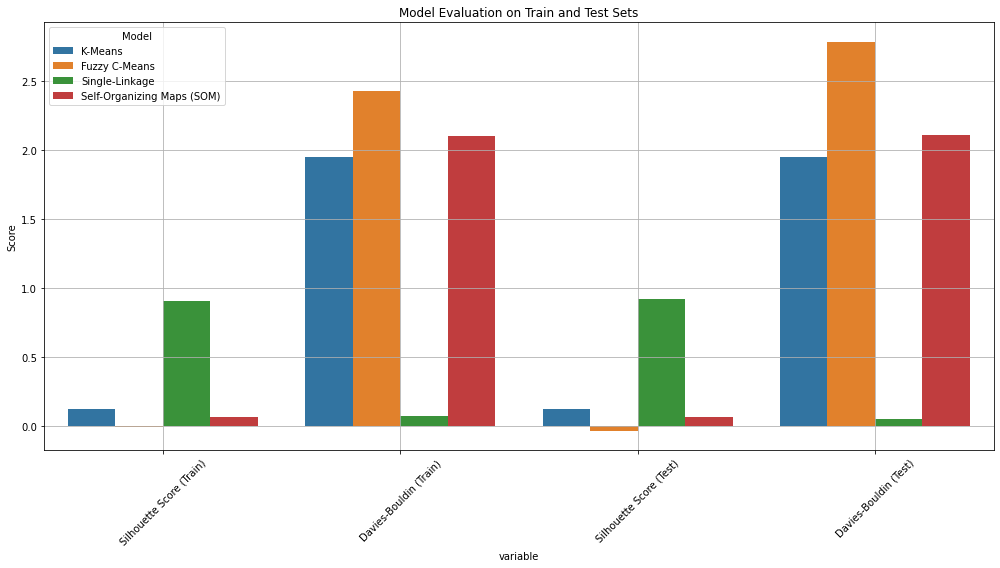

In [16]:
results_df = pd.DataFrame(results)

# Display results
print(results_df)

# Plotting the results
plt.figure(figsize=(14, 8))
sns.barplot(data=results_df.melt(id_vars='Model'), x='variable', y='value', hue='Model')
plt.title('Model Evaluation on Train and Test Sets')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

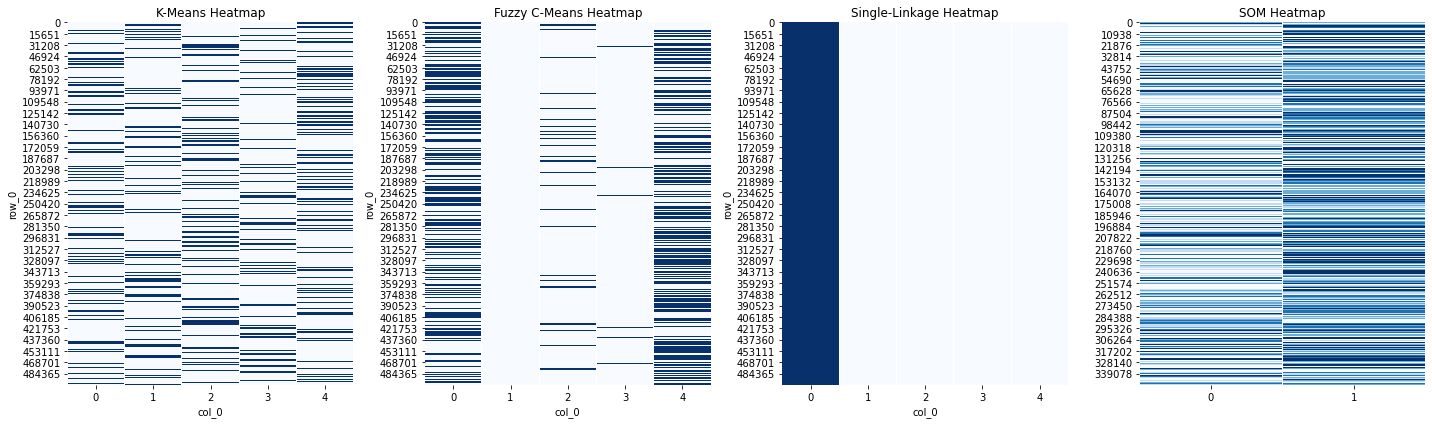

In [28]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 4, 1)
sns.heatmap(pd.crosstab(index=X_train.index, columns=train_clusters_kmeans), cmap='Blues', cbar=False)
plt.title('K-Means Heatmap')

plt.subplot(1, 4, 2)
sns.heatmap(pd.crosstab(index=X_train.index, columns=train_clusters_fcm), cmap='Blues', cbar=False)
plt.title('Fuzzy C-Means Heatmap')

plt.subplot(1, 4, 3)
sns.heatmap(pd.crosstab(index=X_train.index, columns=train_clusters_slink), cmap='Blues', cbar=False)
plt.title('Single-Linkage Heatmap')

plt.subplot(1, 4, 4)
sns.heatmap(train_clusters_som, cmap='Blues', cbar=False)
plt.title('SOM Heatmap')

plt.tight_layout()
plt.show()


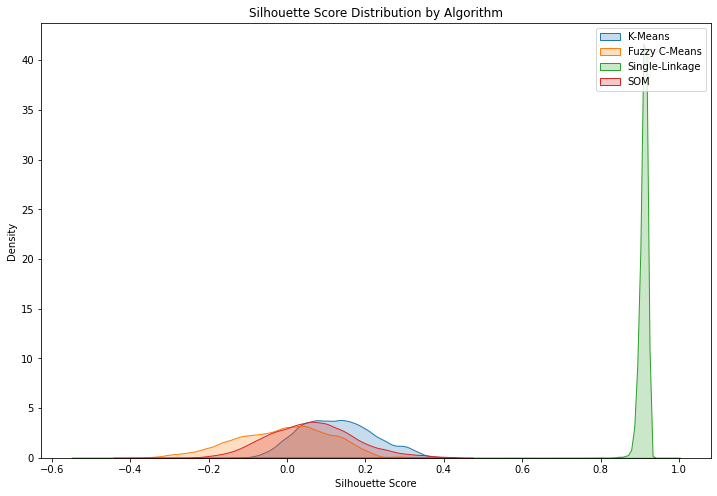

In [34]:
from sklearn.metrics import silhouette_samples

# Calculate silhouette scores for each algorithm
sil_samples_kmeans = silhouette_samples(X_train, train_clusters_kmeans)
sil_samples_fcm = silhouette_samples(X_train, train_clusters_fcm)
sil_samples_slink = silhouette_samples(X_train, train_clusters_slink)
sil_samples_som = silhouette_samples(X_train, [c[0] * 5 + c[1] for c in train_clusters_som])


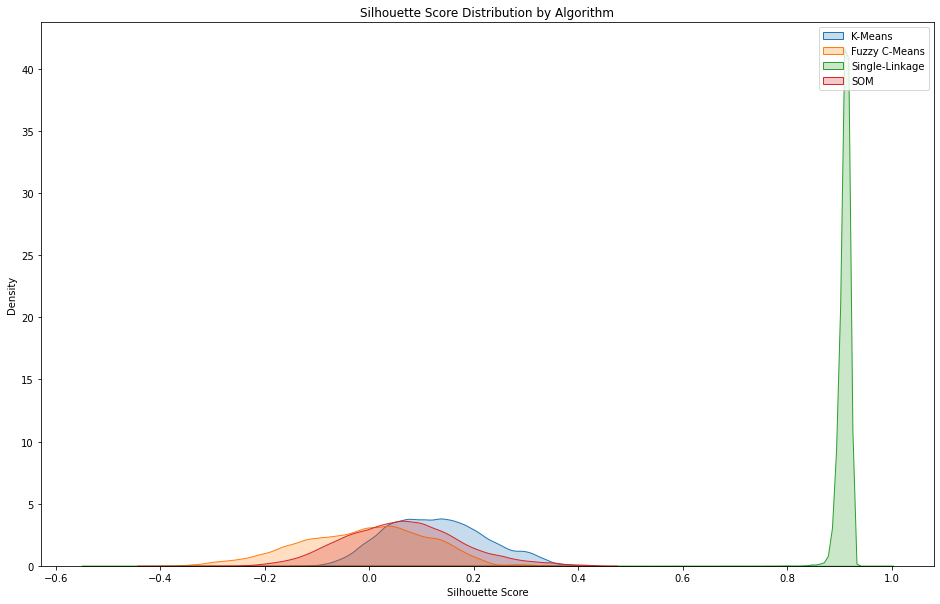

In [35]:

# Plot Silhouette Score Distribution
plt.figure(figsize=(16, 10))
sns.kdeplot(sil_samples_kmeans, label='K-Means', fill=True)
sns.kdeplot(sil_samples_fcm, label='Fuzzy C-Means', fill=True)
sns.kdeplot(sil_samples_slink, label='Single-Linkage', fill=True)
sns.kdeplot(sil_samples_som, label='SOM', fill=True)

plt.title('Silhouette Score Distribution by Algorithm')
plt.xlabel('Silhouette Score')
plt.legend()
plt.show()


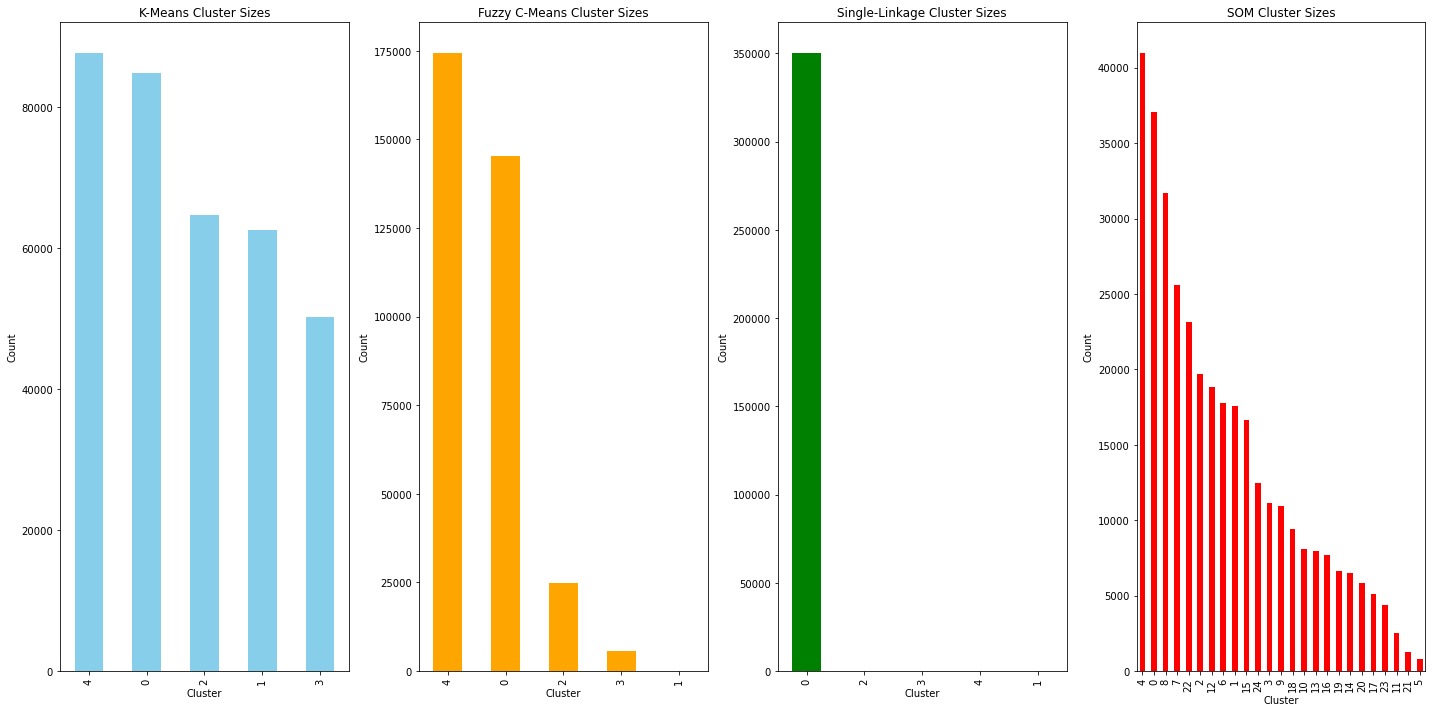

In [26]:
# Cluster size for each algorithm
cluster_sizes_kmeans = pd.Series(train_clusters_kmeans).value_counts()
cluster_sizes_fcm = pd.Series(train_clusters_fcm).value_counts()
cluster_sizes_slink = pd.Series(train_clusters_slink).value_counts()
cluster_sizes_som = pd.Series([c[0] * 5 + c[1] for c in train_clusters_som]).value_counts()

# Plot Cluster Sizes
plt.figure(figsize=(20, 10))

plt.subplot(1, 4, 1)
cluster_sizes_kmeans.plot(kind='bar', color='skyblue')
plt.title('K-Means Cluster Sizes')
plt.xlabel('Cluster')
plt.ylabel('Count')

plt.subplot(1, 4, 2)
cluster_sizes_fcm.plot(kind='bar', color='orange')
plt.title('Fuzzy C-Means Cluster Sizes')
plt.xlabel('Cluster')
plt.ylabel('Count')

plt.subplot(1, 4, 3)
cluster_sizes_slink.plot(kind='bar', color='green')
plt.title('Single-Linkage Cluster Sizes')
plt.xlabel('Cluster')
plt.ylabel('Count')

plt.subplot(1, 4, 4)
cluster_sizes_som.plot(kind='bar', color='red')
plt.title('SOM Cluster Sizes')
plt.xlabel('Cluster')
plt.ylabel('Count')

plt.tight_layout()
plt.show()
